In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# Import CSV
la_liga = pd.read_csv('../Getafe_LaLiga2324/Resources/LaLiga 2324.csv')
la_liga.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHomeGoals,FTAwayGoals,FTResult,HomeShots,AwayShots,HomeYellow,AwayYellow,HomeRed,AwayRed
0,SP1,11/8/2023,18:30,Almeria,Vallecano,0,2,A,19,10,1,3,0,0
1,SP1,11/8/2023,21:00,Sevilla,Valencia,1,2,A,9,10,3,2,1,0
2,SP1,12/8/2023,16:00,Sociedad,Girona,1,1,D,15,6,2,5,0,0
3,SP1,12/8/2023,18:30,Las Palmas,Mallorca,1,1,D,5,12,3,2,0,0
4,SP1,12/8/2023,20:30,Ath Bilbao,Real Madrid,0,2,A,7,14,3,1,0,0


In [16]:
# Focus on Getafe
getafe_matches = la_liga[(la_liga['HomeTeam'] == 'Getafe') | (la_liga['AwayTeam'] == 'Getafe')]
getafe_matches

,Div,Date,Time,HomeTeam,AwayTeam,FTHomeGoals,FTAwayGoals,FTResult,HomeShots,AwayShots,HomeYellow,AwayYellow,HomeRed,AwayRed
7,SP1,13/08/2023,20:30,Getafe,Barcelona,0,0,D,5,14,8,2,1,1
15,SP1,20/08/2023,18:00,Girona,Getafe,3,0,H,7,9,2,5,0,0
28,SP1,28/08/2023,18:30,Getafe,Alaves,1,0,H,15,16,1,2,0,0
33,SP1,2/9/2023,15:15,Real Madrid,Getafe,2,1,H,26,6,2,6,0,0
44,SP1,17/09/2023,13:00,Getafe,Osasuna,3,2,H,11,8,6,2,0,0
54,SP1,24/09/2023,13:00,Sociedad,Getafe,4,3,H,10,10,3,2,0,0
61,SP1,27/09/2023,18:00,Ath Bilbao,Getafe,2,2,D,9,13,5,6,1,0
70,SP1,30/09/2023,13:00,Getafe,Villarreal,0,0,D,22,3,2,4,0,1
87,SP1,8/10/2023,17:30,Celta,Getafe,2,2,D,26,3,1,8,0,1
91,SP1,21/10/2023,15:15,Getafe,Betis,1,1,D,14,13,5,2,0,0


In [18]:
# Filter matches involving Getafe
getafe_matches = la_liga[(la_liga['HomeTeam'] == 'Getafe') | (la_liga['AwayTeam'] == 'Getafe')].copy()

# Add a column to identify if Getafe won the match
getafe_matches.loc[:, 'GetafeWin'] = np.where(
    ((getafe_matches['HomeTeam'] == 'Getafe') & (getafe_matches['FTHomeGoals'] > getafe_matches['FTAwayGoals'])) |
    ((getafe_matches['AwayTeam'] == 'Getafe') & (getafe_matches['FTAwayGoals'] > getafe_matches['FTHomeGoals'])),
    True, False
)

# Filter for only winning results
getafe_wins = getafe_matches[getafe_matches['GetafeWin']]

# Display the table of Getafe's winning results
print(getafe_wins[['Date', 'HomeTeam', 'AwayTeam', 'FTHomeGoals', 'FTAwayGoals', 'FTResult']])


           Date HomeTeam  AwayTeam  FTHomeGoals  FTAwayGoals FTResult
28   28/08/2023   Getafe    Alaves            1            0        H
44   17/09/2023   Getafe   Osasuna            3            2        H
118   6/11/2023   Getafe     Cadiz            1            0        H
131  25/11/2023   Getafe   Almeria            2            1        H
149   8/12/2023   Getafe  Valencia            1            0        H
162  16/12/2023  Sevilla    Getafe            0            3        A
216  29/01/2024   Getafe   Granada            2            0        H
235   11/2/2024   Getafe     Celta            3            2        H
282  16/03/2024   Getafe    Girona            1            0        H
322  27/04/2024  Almeria    Getafe            1            3        A


In [19]:
# Filter matches involving Getafe
getafe_matches = la_liga[(la_liga['HomeTeam'] == 'Getafe') | (la_liga['AwayTeam'] == 'Getafe')].copy()

# Determine Getafe's result for each match
getafe_matches['Result'] = np.where(
    ((getafe_matches['HomeTeam'] == 'Getafe') & (getafe_matches['FTHomeGoals'] > getafe_matches['FTAwayGoals'])) |
    ((getafe_matches['AwayTeam'] == 'Getafe') & (getafe_matches['FTAwayGoals'] > getafe_matches['FTHomeGoals'])),
    'Win',
    np.where(
        getafe_matches['FTHomeGoals'] == getafe_matches['FTAwayGoals'],
        'Draw',
        'Loss'
    )
)

# Calculate totals for wins, draws, and losses
result_counts = getafe_matches['Result'].value_counts()

# Display the totals
wins = result_counts.get('Win', 0)
draws = result_counts.get('Draw', 0)
losses = result_counts.get('Loss', 0)

print(f"Total Wins: {wins}")
print(f"Total Draws: {draws}")
print(f"Total Losses: {losses}")

Total Wins: 10
Total Draws: 13
Total Losses: 15


  GameType  GetafeYellow  GetafeRed
0     Away            76          3
1     Home            59          5


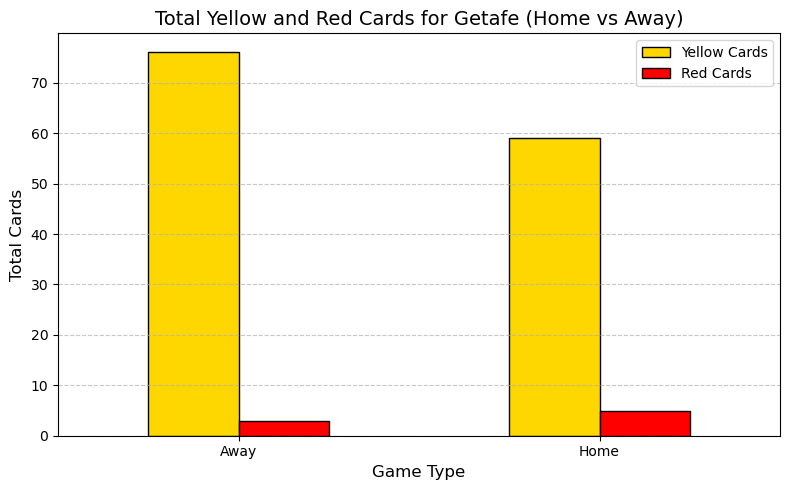

In [22]:
# Filter matches involving Getafe
getafe_matches = la_liga[(la_liga['HomeTeam'] == 'Getafe') | (la_liga['AwayTeam'] == 'Getafe')].copy()

# Add columns for Getafe's yellow and red cards
getafe_matches['GetafeYellow'] = np.where(getafe_matches['HomeTeam'] == 'Getafe', 
                                          getafe_matches['HomeYellow'], 
                                          getafe_matches['AwayYellow'])
getafe_matches['GetafeRed'] = np.where(getafe_matches['HomeTeam'] == 'Getafe', 
                                       getafe_matches['HomeRed'], 
                                       getafe_matches['AwayRed'])

# Add a column to specify if the match was home or away
getafe_matches['GameType'] = np.where(getafe_matches['HomeTeam'] == 'Getafe', 'Home', 'Away')

# Group by game type (Home/Away) and sum the yellow and red cards
card_totals = getafe_matches.groupby('GameType')[['GetafeYellow', 'GetafeRed']].sum()

# Reset the index for better display
card_totals.reset_index(inplace=True)

# Display the results
print(card_totals)

# Plot the totals
card_totals.plot(x='GameType', kind='bar', figsize=(8, 5), color=['gold', 'red'], edgecolor='black')
plt.title('Total Yellow and Red Cards for Getafe (Home vs Away)', fontsize=14)
plt.xlabel('Game Type', fontsize=12)
plt.ylabel('Total Cards', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(['Yellow Cards', 'Red Cards'])
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()